In [6]:
# Import pandas as a alias 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style="darkgrid", font_scale = 1.5, color_codes=True)

# Load the CSV file "Mall_Customer.csv"
customer = pd.read_csv("./Desktop/Data Science/csv_file/Mall_Customers.csv", index_col = 'CustomerID')

In [7]:
# print csv file structure
customer.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [8]:
# print csv file data type
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [9]:
customer.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [10]:
customer.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [11]:
customer.drop_duplicates(inplace = True)

In [91]:
# using only Spending_Score and income variable for easy visualisation
X = customer.iloc[:, [2, 3]].values

In [201]:
# Fitting DBSCAN to the dataset
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=9, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

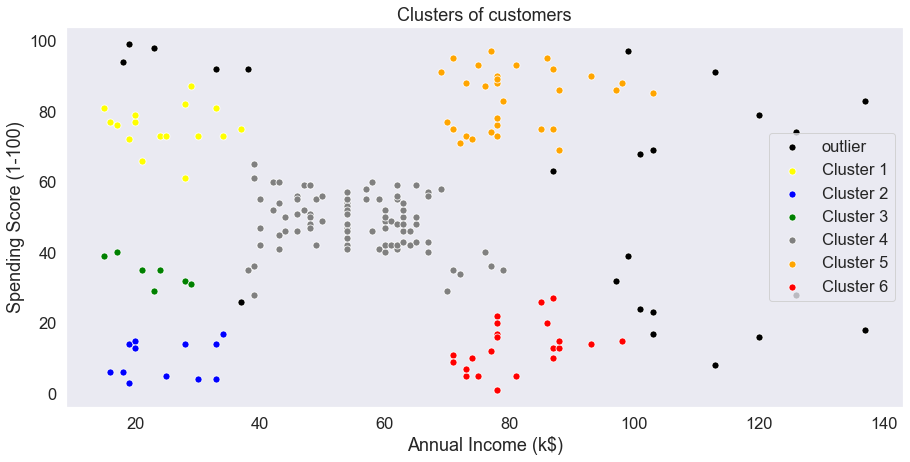

In [210]:
plt.figure(figsize=(15, 7))

sns.scatterplot(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], color = 'black', label = 'outlier', s=50)
sns.scatterplot(X[y_dbscan == 0, 0], X[y_dbscan == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_dbscan == 1, 0], X[y_dbscan == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_dbscan == 2, 0], X[y_dbscan == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_dbscan == 3, 0], X[y_dbscan == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_dbscan == 4, 0], X[y_dbscan == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(X[y_dbscan == 5, 0], X[y_dbscan == 5, 1], color = 'red', label = 'Cluster 6',s=50)


plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()